<a href="https://colab.research.google.com/github/JakeOh/202504_itwill_oracle88/blob/main/python22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요 패키지, 모듈 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame Concat

In [4]:
np.random.seed(42)
df1 = pd.DataFrame(data={
    'id': np.arange(1, 6),
    'korean': np.random.randint(101, size=5),  # [0, 101) 범위의 정수 난수 5개로 이루어진 배열
    'english': np.random.randint(101, size=5)
})
df1

,id,korean,english
0,1,51,20
1,2,92,82
2,3,14,86
3,4,71,74
4,5,60,74


In [5]:
df2 = pd.DataFrame(data={
    'id': np.arange(6, 11),
    'korean': np.random.randint(101, size=5),  # [0, 101) 범위의 정수 난수 5개로 이루어진 배열
    'english': np.random.randint(101, size=5)
})
df2

,id,korean,english
0,6,87,52
1,7,99,1
2,8,23,87
3,9,2,29
4,10,21,37


In [10]:
df = pd.concat([df1, df2], ignore_index=True)
df

,id,korean,english
0,1,51,20
1,2,92,82
2,3,14,86
3,4,71,74
4,5,60,74
5,6,87,52
6,7,99,1
7,8,23,87
8,9,2,29
9,10,21,37


# babynames 데이터셋

In [20]:
col_names = ['name', 'gender', 'births']
file_path = 'https://raw.githubusercontent.com/wesm/pydata-book/refs/heads/3rd-edition/datasets/babynames/yob1880.txt'
yob1880 = pd.read_csv(file_path, names=col_names)
yob1880['year'] = 1880  # 데이터프레임 yob1880에 컬럼 year를 추가.

In [21]:
yob1880.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [22]:
yob1880.tail()

,name,gender,births,year
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880
1999,Zachariah,M,5,1880


*   https://github.com/wesm/pydata-book/tree/3rd-edition/datasets/babynames/ 데이터 파일들을 사용.
    *   1880년부터 2010년까지 미국 신생아들의 이름, 성별, 출생자 수가 연도별로 정리된 파일들
*   연도별 파일을 하나씩 읽어서 데이터프레임을 생성.
*   생성된 데이터프레임에 year 컬럼 추가.
*   131개 파일을 하나의 데이터프레임으로 합침(concat)

In [25]:
col_names = ['name', 'gender', 'births']  # 데이터프레임의 컬럼 이름
yobs = []  # 연도별 데이터프레임들을 저장할 리스트
for year in range(1880, 2011):
    # github에 저장된 파일 경로
    file_path = f'https://raw.githubusercontent.com/wesm/pydata-book/refs/heads/3rd-edition/datasets/babynames/yob{year}.txt'

    # github에 저장된 CSV 파일을 읽어서 데이터프레임을 생성
    yob_year = pd.read_csv(file_path, names=col_names)

    # 생성된 데이터프레임에 year 컬럼 추가
    yob_year['year'] = year

    # 리스트에 데이터프레임을 추가
    yobs.append(yob_year)

In [26]:
# 리스트 원소 개수
len(yobs)

131

In [28]:
print(type(yobs[-1]))

<class 'pandas.core.frame.DataFrame'>


In [30]:
yobs[0].head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [31]:
yobs[0].tail()

,name,gender,births,year
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880
1999,Zachariah,M,5,1880


In [32]:
yobs[-1].head()

,name,gender,births,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010


데이터프레임들의 리스트를 하나의 데이터프레임으로 합침(concat)

In [33]:
yob_df = pd.concat(yobs, ignore_index=True)

In [34]:
yob_df.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [35]:
yob_df.tail()

,name,gender,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [36]:
yob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   gender  1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


## 연도별 신생아 수

In [37]:
births_by_year = yob_df.groupby(by=['year']).births.sum()
births_by_year

,births
year,
1880,201486
1881,192703
1882,221538
1883,216954
1884,243466
...,...
2006,3946702
2007,3986130
2008,3915955


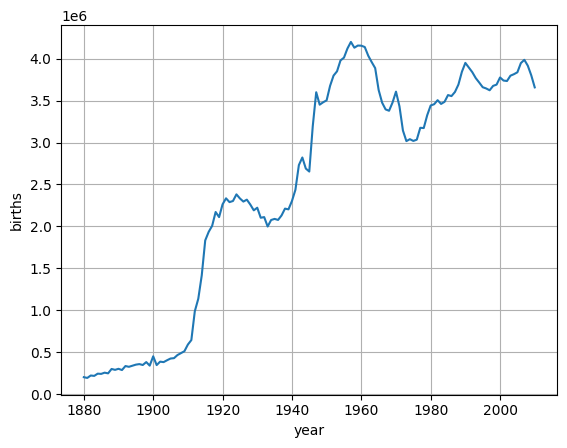

In [38]:
sns.lineplot(x=births_by_year.index, y=births_by_year)
plt.grid()
plt.show()

`groupby()` 함수를 호출할 때 그룹을 설정하는 변수(컬럼 이름)를 인덱스가 아닌 컬럼으로 만들기.

In [39]:
yob_df.groupby(by=['year'], as_index=False).births.sum()

,year,births
0,1880,201486
1,1881,192703
2,1882,221538
3,1883,216954
4,1884,243466
...,...,...
126,2006,3946702
127,2007,3986130
128,2008,3915955
129,2009,3801002


시리즈(Series) 또는 데이터프레임(DataFrame)의 인덱스(행 레이블)를 컬럼으로 변환.

In [41]:
births_by_year.reset_index()

,year,births
0,1880,201486
1,1881,192703
2,1882,221538
3,1883,216954
4,1884,243466
...,...,...
126,2006,3946702
127,2007,3986130
128,2008,3915955
129,2009,3801002


## 연도별 성별 신생아 수